# AirBnB NYC Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?


Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from scipy.stats import norm
from scipy import stats

In [2]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')

In [3]:
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
air_bnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
air_bnb.head().append(air_bnb.tail())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
air_bnb.shape

(48895, 16)

In [7]:
# Which hosts are the busiest and why?

host_busiest = (pd.DataFrame(air_bnb.host_id.value_counts())).head(3)
host_busiest.columns=['Listings']
host_busiest['host_id'] = host_busiest.index
host_busiest.reset_index(drop=True, inplace=True) #keeping track order
host_busiest                                

,Listings,host_id
0,327,219517861
1,232,107434423
2,121,30283594


In [8]:
# How many neighborhood groups are available and which shows up the most?

groups = air_bnb.drop_duplicates('neighbourhood_group').reset_index(drop=True).count()['neighbourhood_group']
air_bnb[['neighbourhood_group','id']].groupby('neighbourhood_group', as_index = False).count().sort_values('id', ascending = False)
most_common = air_bnb['neighbourhood_group'][0]

print(f'There are {groups} neighborhood groups total and {most_common} shows up the most.')

There are 5 neighborhood groups total and Brooklyn shows up the most.


In [9]:
# Are private rooms the most popular in manhattan?

manhattan = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']
manhattan[['id','name','room_type']].groupby('room_type', as_index = False).count().sort_values('id', ascending = False)

,room_type,id,name
0,Entire home/apt,13199,13193
1,Private room,7982,7979
2,Shared room,480,480


In [10]:
# Which hosts are the busiest and based on their reviews?

air_bnb.groupby(['host_id','number_of_reviews'], as_index=False).sum().sort_values('number_of_reviews', ascending = False)

,host_id,number_of_reviews,id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
27827,47621202,629,9145202,40.66730,-73.76831,47,1,14.58,2,333
8843,4734398,607,903972,40.82085,-73.94025,49,1,7.75,3,293
8842,4734398,597,903947,40.82124,-73.93838,49,1,7.72,3,342
8841,4734398,594,891117,40.82264,-73.94041,49,1,7.57,3,339
27826,47621202,576,10101135,40.66939,-73.76975,47,1,13.40,2,173
...,...,...,...,...,...,...,...,...,...,...
21598,25099638,0,25888428,40.71306,-74.00569,150,1,0.00,1,90
21591,25082897,0,4967258,40.70516,-73.91609,40,1,0.00,1,0
21583,25073318,0,4874334,40.69203,-73.97088,250,4,0.00,1,0
21580,25064843,0,19681256,40.71938,-74.00163,550,2,0.00,1,0


In [11]:
#Which neighorhood group has the highest average price?

air_bnb.groupby('neighbourhood_group', as_index = False).mean().sort_values('price', ascending = False)[['neighbourhood_group','price']].head(1)

,neighbourhood_group,price
2,Manhattan,196.875814


In [12]:
# Which neighborhood group has the highest total price?

air_bnb.groupby('neighbourhood_group', as_index = False).sum().sort_values('price', ascending = False)

,neighbourhood_group,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,406683958152,1469279004836,883012.01680,-1.602364e+06,4264527,185833,454569,21158.08,277073,2425586
1,Brooklyn,367035792483,1140203577483,817931.96821,-1.486715e+06,2500600,121761,486574,21104.98,45925,2015070
3,Queens,123263814259,544824426112,230784.85597,-4.185631e+05,563867,29358,156950,8879.05,23005,818464
0,Bronx,24803796188,115220380205,44565.50071,-8.060805e+04,95459,4976,28371,1609.94,2437,180843
4,Staten Island,8055857451,36753031930,15147.61383,-2.764147e+04,42825,1802,11541,587.99,865,74480


In [13]:
# Which top 5 hosts have the highest total price?

highest_price = air_bnb.groupby('host_name',as_index = False).sum().sort_values('price', ascending = False)
highest_price.head(5)

,host_name,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9781,Sonder (NYC),10885561678,71782340547,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588
1356,Blueground,7210036953,24924786136,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884
7135,Michael,7430617239,22673153604,16984.89137,-30841.28573,66895,4600,11081,475.82,1043,38888
2376,David,7943862898,28633613354,16414.34392,-29804.53757,65844,3754,8103,508.61,907,44171
314,Alex,5496620312,19850092761,11361.10533,-20635.86235,52563,1651,6204,443.44,475,30031


In [14]:
# Who currently has no (zero) availability with a review count of 100 or more?

no_availability = air_bnb[air_bnb['availability_365'] == 0]
high_reviews = no_availability.groupby(['name','host_name','number_of_reviews','availability_365'], as_index = False).sum().sort_values('number_of_reviews',ascending=False)
high_reviews[high_reviews['number_of_reviews']>=100][['host_name','name','number_of_reviews','availability_365']]

,host_name,name,number_of_reviews,availability_365
8674,Wanda,LG Private Room/Family Friendly,480,0
8566,Gurpreet Singh,JFK 10 & LGA 15 MINUTES A/C PRIVATE BEDROOM,424,0
8565,Gurpreet Singh,JFK 10 & LGA 15 MINUTES AWAY A/C PRIVATE BED...,408,0
12997,Deloris,Relaxing Quiet Room Just 6 Mins from JFK Airport!,368,0
947,Veronica,A Superhost SALE! DELUXE Room!,351,0
...,...,...,...,...
13872,Anna,Spacious 2 Bedroom Apartment by Central Park,101,0
8606,Abraham,"King Bed, Private Room in Crown Heights, Comedian",100,0
12,Braydon,"""Quaint-Essential"" Living in the West Village",100,0
1063,Marisha,Adorable Crown Heights Home Away From Home,100,0


In [15]:
# What host has the highest total of prices and where are they located?

highest_price = air_bnb.groupby(['host_name','neighbourhood'],as_index = False).sum().sort_values('price', ascending = False).head()
highest_price.head()[['host_name','neighbourhood']]

,host_name,neighbourhood
25263,Sonder (NYC),Financial District
22593,Red Awning,Midtown
15041,Kevin,Chelsea
12739,Jessica,Clinton Hill
10706,Henry,Upper West Side


In [16]:
# When did Danielle from Queens last receive a review?

air_bnb[air_bnb['host_name']=='Danielle'][['host_name','last_review']]


,host_name,last_review
555,Danielle,2019-04-30
1060,Danielle,2018-03-27
2902,Danielle,2018-10-18
3062,Danielle,2019-06-25
3739,Danielle,2016-12-30
...,...,...
43825,Danielle,NaN
44542,Danielle,2019-06-01
46507,Danielle,2019-06-18
47994,Danielle,2019-07-02


## Further Questions

1. Which host has the most listings?

In [17]:
air_bnb.groupby('host_name').count().sort_values('name', ascending = False).head(1)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_name,,,,,,,,,,,,,,,
Michael,417,417,417,417,417,417,417,417,417,417,417,335,335,417,417


2. How many listings have completely open availability?

In [18]:
air_bnb[air_bnb['availability_365']==365].count()['availability_365']


1295

3. What room_types have the highest review numbers?

In [19]:
air_bnb.groupby(['room_type']).mean().sort_values('number_of_reviews',ascending=False)[['number_of_reviews','reviews_per_month']]

,number_of_reviews,reviews_per_month
room_type,,
Private room,24.112962,1.445209
Entire home/apt,22.842418,1.306578
Shared room,16.600000,1.471726


# Data Wrangling(Cleansing)

In [20]:
air_bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
air_bnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [22]:
air_bnb.fillna({'reviews_per_month':0}, inplace=True)
#Checking work
air_bnb.reviews_per_month.isnull().sum()

0

Text(0.5, 1.0, 'Room Type vs Price')

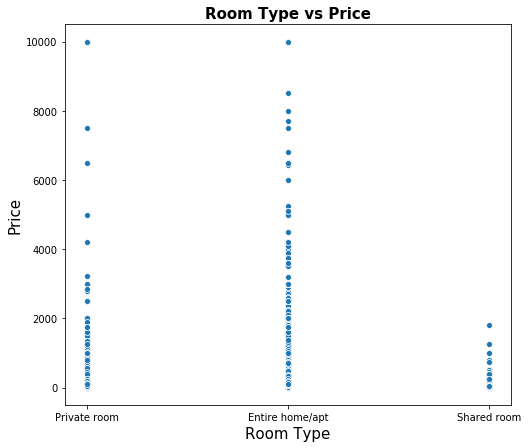

In [23]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='room_type', y='price', data=air_bnb)

plt.xlabel("Room Type", size=15)
plt.ylabel("Price", size=15)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Neighborhoods with Most Number of Rooms Available')

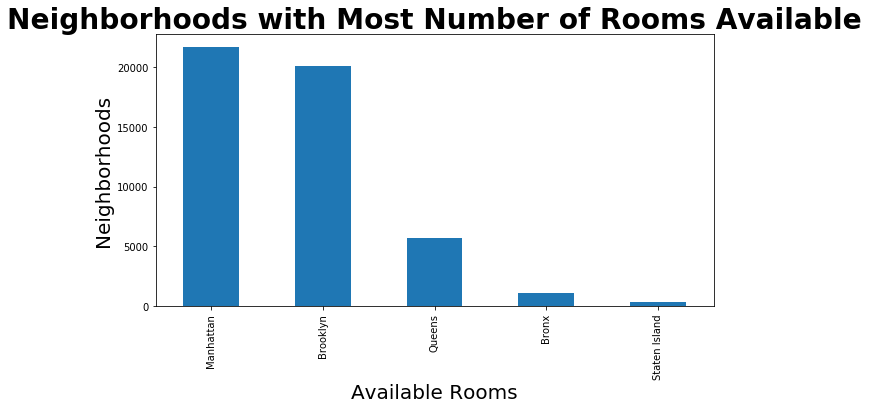

In [24]:
# Neighborhoods with most places for rent
Available_Rent = air_bnb['neighbourhood_group'].value_counts()
(Available_Rent.head(20)).plot.bar(figsize =(10, 5))

plt.xlabel("Available Rooms", size=20)
plt.ylabel("Neighborhoods", size=20)
plt.title("Neighborhoods with Most Number of Rooms Available",size=28, weight='bold')

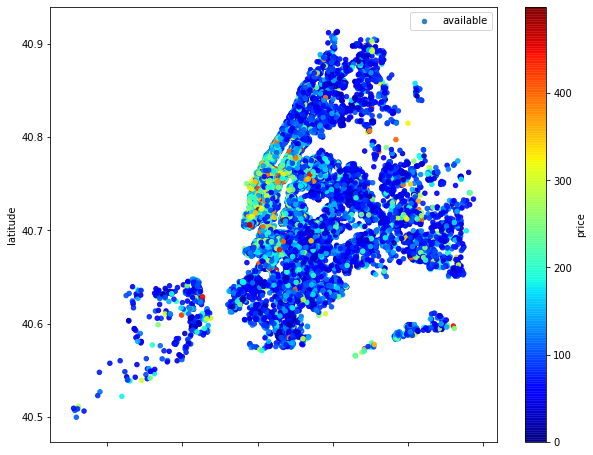

In [25]:
Under_500 = air_bnb[air_bnb.price < 500]
map1 = Under_500.plot(kind='scatter', x='longitude', y='latitude', label='available', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.9, figsize=(10,8))
map1.legend()

# Final Conclusion

>This case study was done to display the disparities of rent in neighborhoods that exist and show affluent areas in
NYC are renting more rooms at higher costs. Staten Island has the least rooms available while Manhatten has the most. This study also shows how people rent AirBnb spaces. Renters are more willing to rent the most private spaces available rather than shared spaces that are much cheaper. Most rentals are under 250 USD and the majority spend between 100-200 USD.

>Wanda is highly rated and booked solid, she is the most popular host. Michael had the most listing. 1295 AirBnbs have yet to be booked at all. Host Sonder from the Financial District has the highest total listing prices. 

Text(0, 0.5, 'Probablity')

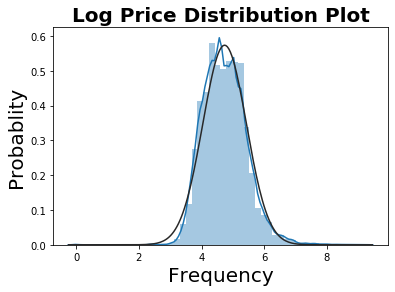

In [27]:
#right skewed, not a bell-curve
air_bnb['price_log'] = np.log(air_bnb.price+1)
#less people are willing to pay more as excpected as there is a plateau to the right\
plt.figure()
sns.distplot(air_bnb['price_log'], fit=norm)
plt.title("Log Price Distribution Plot",size=20, weight='bold')
plt.xlabel("Frequency", size=20)
plt.ylabel("Probablity", size=20)